In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression


In [2]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/weatherAUS.csv')

In [3]:
# Preview data
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


1. Exploratory Data Analysis and Data Understanding

(a) Perform data cleaning and compute summary statistics for the dataset.

In [4]:
df.isnull().sum()


,0
Date,0
Location,0
MinTemp,1485
MaxTemp,1261
Rainfall,3261
Evaporation,62790
Sunshine,69835
WindGustDir,10326
WindGustSpeed,10263
WindDir9am,10566


In [ ]:
# Separate numerical and categorical columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

# Fill numerical missing values with median
for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)

# Fill categorical missing values with mode
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)


/tmp/ipython-input-931902113.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
/tmp/ipython-input-931902113.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using

In [ ]:
df.isnull().sum().sum()


np.int64(0)

In [ ]:
df.describe()


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000
mean,12.192053,23.215962,2.307990,5.179779,7.989889,39.962189,14.030751,18.669758,68.901251,51.553396,1017.644768,1015.250115,4.659755,4.709913,16.987101,21.668916
std,6.365780,7.088358,8.389771,3.178819,2.757790,13.120931,8.861796,8.716716,18.855360,20.471345,6.728484,6.663994,2.281490,2.106768,6.449299,6.850658
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000
25%,7.700000,18.000000,0.000000,4.000000,8.200000,31.000000,7.000000,13.000000,57.000000,37.000000,1013.500000,1011.100000,3.000000,4.000000,12.300000,16.700000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000
75%,16.800000,28.200000,0.600000,5.200000,8.700000,46.000000,19.000000,24.000000,83.000000,65.000000,1021.800000,1019.400000,6.000000,6.000000,21.500000,26.200000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000


In [ ]:
df.describe(include='object')


,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
count,145460,145460,145460,145460,145460,145460,145460
unique,3436,49,16,16,16,2,2
top,2017-06-24,Canberra,W,N,SE,No,No
freq,49,3436,20241,22324,15066,113580,113583


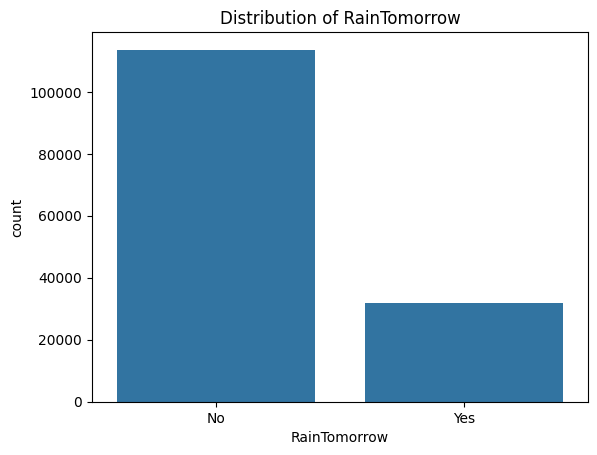

In [ ]:
sns.countplot(x='RainTomorrow', data=df)
plt.title('Distribution of RainTomorrow')
plt.show()


(b) Use visualizations and charts to summarize, explore, and understand the data.


1. Target Variable Distribution (RainTomorrow)

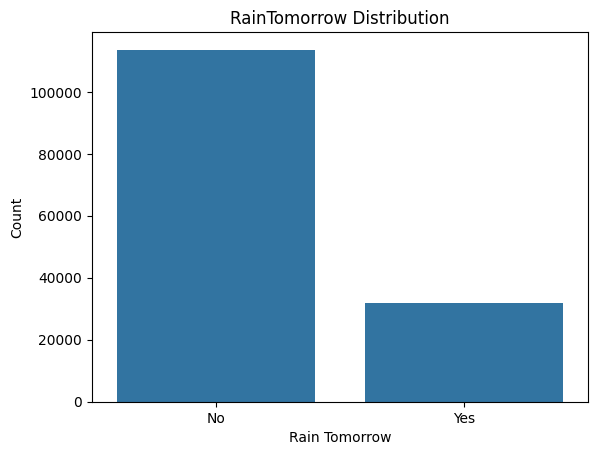

In [ ]:
sns.countplot(x='RainTomorrow', data=df)
plt.title('RainTomorrow Distribution')
plt.xlabel('Rain Tomorrow')
plt.ylabel('Count')
plt.show()


2. Rainfall vs RainTomorrow

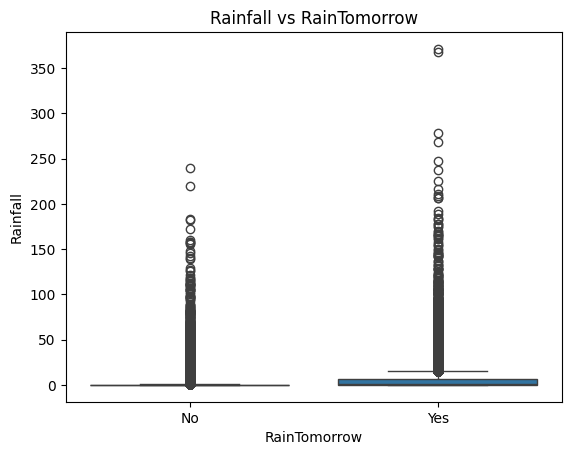

In [ ]:
sns.boxplot(x='RainTomorrow', y='Rainfall', data=df)
plt.title('Rainfall vs RainTomorrow')
plt.show()


3. Temperature Analysis

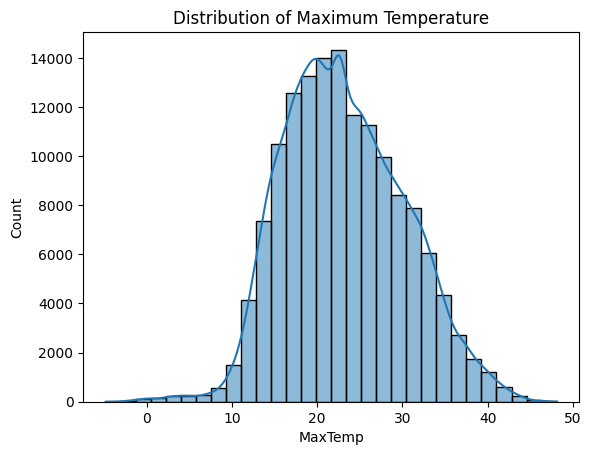

In [ ]:
sns.histplot(df['MaxTemp'], bins=30, kde=True)
plt.title('Distribution of Maximum Temperature')
plt.show()


4. Humidity vs RainTomorrow


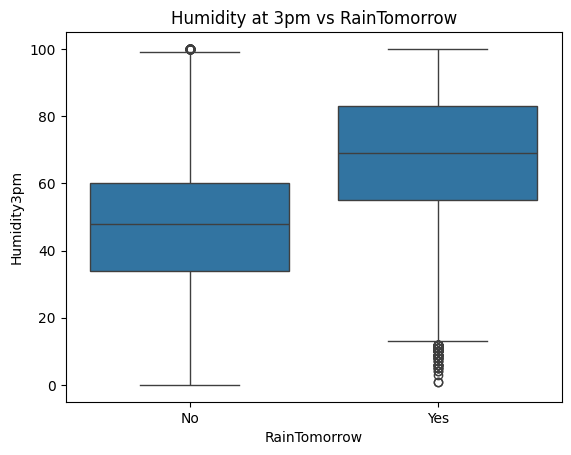

In [ ]:
sns.boxplot(x='RainTomorrow', y='Humidity3pm', data=df)
plt.title('Humidity at 3pm vs RainTomorrow')
plt.show()


5. Wind Speed Analysis

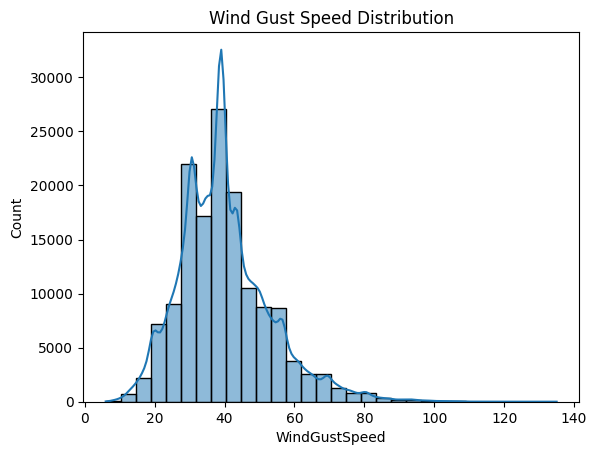

In [ ]:
sns.histplot(df['WindGustSpeed'], bins=30, kde=True)
plt.title('Wind Gust Speed Distribution')
plt.show()


6. RainToday vs RainTomorrow

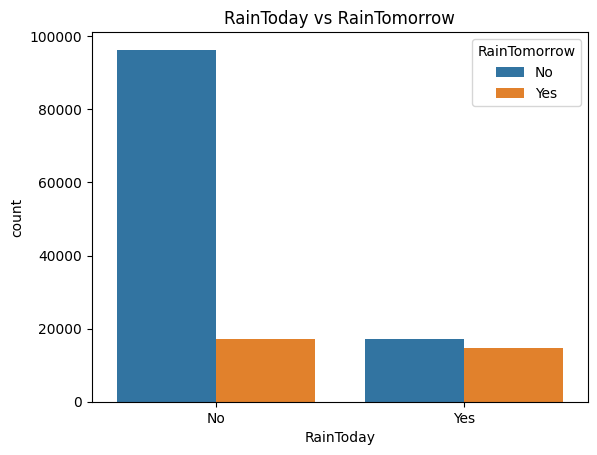

In [ ]:
sns.countplot(x='RainToday', hue='RainTomorrow', data=df)
plt.title('RainToday vs RainTomorrow')
plt.show()


2. Build a Neural Network Model

Step 1: Preparing data for Neural Network.

i. Encode categorical variables

In [ ]:
# Copy dataset to avoid modifying original
df_nn = df.copy()

# Encode categorical variables
label_encoder = LabelEncoder()
for col in cat_cols:
    df_nn[col] = label_encoder.fit_transform(df_nn[col])


ii. Define features (X) and target (y)

In [ ]:
X = df_nn.drop('RainTomorrow', axis=1)
y = df_nn['RainTomorrow']


iii. Train–test split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


iv. Feature scaling

In [ ]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Step 2: Design and Implement Neural Network

MLP Classifier

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(
    hidden_layer_sizes=(64, 32),
    activation='relu',
    solver='adam',
    max_iter=300,
    random_state=42
)

mlp.fit(X_train_scaled, y_train)


MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=300, random_state=42)

Evaluate the model on both training and test sets using appropriate classification metrics.

Predictions

In [ ]:
y_train_pred = mlp.predict(X_train_scaled)
y_test_pred = mlp.predict(X_test_scaled)


Accuracy

In [ ]:
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Testing Accuracy:", accuracy_score(y_test, y_test_pred))


Training Accuracy: 0.8727657087859205
Testing Accuracy: 0.8537398597552591


In [ ]:
print(classification_report(y_test, y_test_pred))


              precision    recall  f1-score   support

           0       0.88      0.94      0.91     22717
           1       0.72      0.54      0.62      6375

    accuracy                           0.85     29092
   macro avg       0.80      0.74      0.76     29092
weighted avg       0.84      0.85      0.85     29092



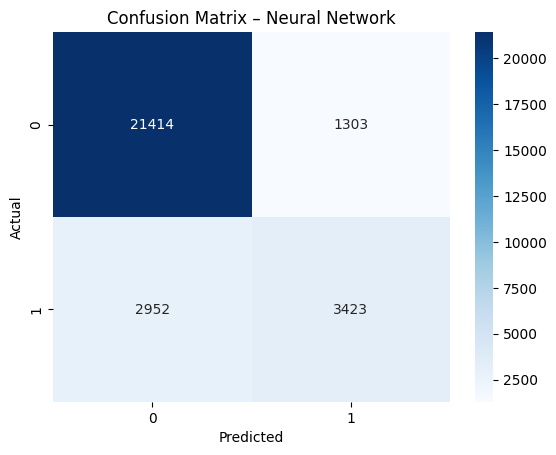

In [ ]:
cm = confusion_matrix(y_test, y_test_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix – Neural Network')
plt.show()


3. Build a Primary Model

Step 1: Train–Test Split

In [ ]:
# Features and target
X = df_nn.drop('RainTomorrow', axis=1)
y = df_nn['RainTomorrow']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


Step 2: Feature Scaling

In [ ]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Model 1 – Logistic Regression









Model Training

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=300, random_state=42)
log_reg.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=300, random_state=42)

Evaluation

In [ ]:
y_pred_lr = log_reg.predict(X_test_scaled)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


Logistic Regression Accuracy: 0.8470026124020349
              precision    recall  f1-score   support

           0       0.87      0.95      0.91     22717
           1       0.72      0.49      0.58      6375

    accuracy                           0.85     29092
   macro avg       0.80      0.72      0.74     29092
weighted avg       0.84      0.85      0.84     29092



Confusion Matrix

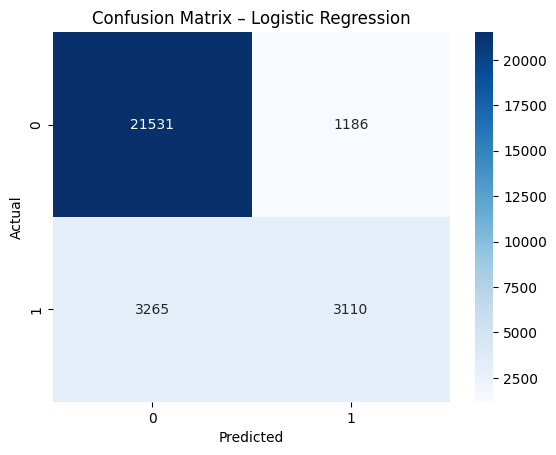

In [ ]:
cm_lr = confusion_matrix(y_test, y_pred_lr)

sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix – Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Model 2 – Decision Tree Classifier

*   Model Training


In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(
    max_depth=10,
    min_samples_split=20,
    random_state=42
)

dt.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=10, min_samples_split=20, random_state=42)

*   Evaluation




In [ ]:
y_pred_dt = dt.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))


Decision Tree Accuracy: 0.8412622026673999
              precision    recall  f1-score   support

           0       0.87      0.94      0.90     22717
           1       0.70      0.48      0.57      6375

    accuracy                           0.84     29092
   macro avg       0.78      0.71      0.74     29092
weighted avg       0.83      0.84      0.83     29092



Confusion Matrix



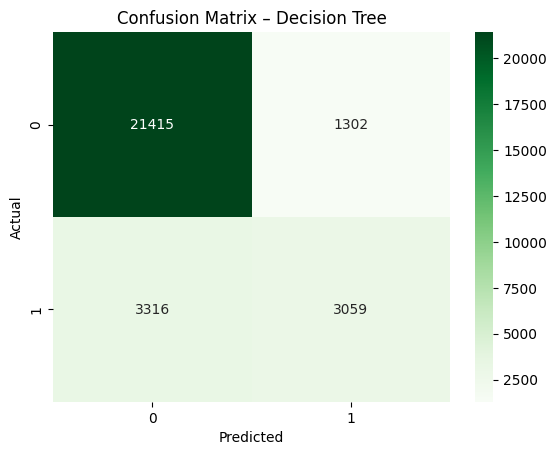

In [ ]:
cm_dt = confusion_matrix(y_test, y_pred_dt)

sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix – Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


4. Hyper-Parameter Optimization with Cross-Validation

  






             

             



 4.1.  Identify the hyperparameters of the models used in Task - 3

i. Logistic Regression

Key hyperparameters:

* C → regularization strength   
* penalty → L1 / L2 regularization
* solver → optimization algorithm

ii. Decision Tree

Key hyperparameters:

*  max_depth
*  min_samples_split
*  min_samples_leaf
*  criterion





4.2 Hyper-Parameter Tuning using GridSearchCV

Logistic Regression – Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV

lr_param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs']
}

lr_grid = GridSearchCV(
    LogisticRegression(max_iter=300, random_state=42),
    lr_param_grid,
    cv=5,
    scoring='f1'
)

lr_grid.fit(X_train_scaled, y_train)


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=300, random_state=42),
             param_grid={'C': [0.01, 0.1, 1, 10], 'penalty': ['l2'],
                         'solver': ['lbfgs']},
             scoring='f1')

Best Logistic Regression Parameters

In [ ]:
print("Best LR Parameters:", lr_grid.best_params_)
print("Best LR CV Score:", lr_grid.best_score_)


Best LR Parameters: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
Best LR CV Score: 0.5686757899324101




Decision Tree – Grid Search



In [ ]:
dt_param_grid = {
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [10, 20, 50],
    'min_samples_leaf': [5, 10, 20],
    'criterion': ['gini', 'entropy']
}

dt_grid = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    dt_param_grid,
    cv=5,
    scoring='f1'
)

dt_grid.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 15, None],
                         'min_samples_leaf': [5, 10, 20],
                         'min_samples_split': [10, 20, 50]},
             scoring='f1')

Best Decision Tree Parameters

In [ ]:
print("Best DT Parameters:", dt_grid.best_params_)
print("Best DT CV Score:", dt_grid.best_score_)


Best DT Parameters: {'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 20, 'min_samples_split': 50}
Best DT CV Score: 0.5693200103870351


5. Feature Selection

5.1 Feature Selection for Logistic Regression (L1 Regularization)

In [ ]:
lr_l1 = LogisticRegression(
    penalty='l1',
    solver='liblinear',
    C=1,
    random_state=42
)

lr_l1.fit(X_train_scaled, y_train)


LogisticRegression(C=1, penalty='l1', random_state=42, solver='liblinear')

Select Important Features

In [ ]:
lr_coeff = np.abs(lr_l1.coef_[0])
selected_lr_features = X.columns[lr_coeff > np.mean(lr_coeff)]

len(selected_lr_features), selected_lr_features


(6,
 Index(['Sunshine', 'WindGustSpeed', 'Humidity3pm', 'Pressure9am',
        'Pressure3pm', 'Cloud3pm'],
       dtype='object'))

5.2 Feature Selection for Decision Tree

In [ ]:
dt_best = dt_grid.best_estimator_

importances = dt_best.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

feature_importance_df.head(10)


,Feature,Importance
14,Humidity3pm,0.511614
8,WindGustSpeed,0.099652
16,Pressure3pm,0.063729
4,Rainfall,0.050670
6,Sunshine,0.048048
2,MinTemp,0.022816
1,Location,0.019812
19,Temp9am,0.019103
13,Humidity9am,0.017519
18,Cloud3pm,0.017122


Select Top Features

In [ ]:
selected_dt_features = feature_importance_df.head(8)['Feature'].values
selected_dt_features


array(['Humidity3pm', 'WindGustSpeed', 'Pressure3pm', 'Rainfall',
       'Sunshine', 'MinTemp', 'Location', 'Temp9am'], dtype=object)

6. Final Models & Comparative Analysis

   6.1 Rebuild Final Models with:

*   Optimal hyperparameters
*   Selected features




Final Logistic Regression

In [ ]:
X_train_lr = X_train[selected_lr_features]
X_test_lr = X_test[selected_lr_features]

X_train_lr_scaled = scaler.fit_transform(X_train_lr)
X_test_lr_scaled = scaler.transform(X_test_lr)

final_lr = lr_grid.best_estimator_
final_lr.fit(X_train_lr_scaled, y_train)

y_pred_lr_final = final_lr.predict(X_test_lr_scaled)


Final Decision Tree

In [ ]:
X_train_dt = X_train[selected_dt_features]
X_test_dt = X_test[selected_dt_features]

final_dt = dt_grid.best_estimator_
final_dt.fit(X_train_dt, y_train)

y_pred_dt_final = final_dt.predict(X_test_dt)



6.2 Final Model Evaluation

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score


Logistic Regression Metrics

In [ ]:
lr_acc = accuracy_score(y_test, y_pred_lr_final)
lr_prec = precision_score(y_test, y_pred_lr_final)
lr_rec = recall_score(y_test, y_pred_lr_final)
lr_f1 = f1_score(y_test, y_pred_lr_final)
print("Logistic Regression Performance")
print("Accuracy :", lr_acc)
print("Precision:", lr_prec)
print("Recall   :", lr_rec)
print("F1-score :", lr_f1)


Logistic Regression Performance
Accuracy : 0.8417434346212017
Precision: 0.7126050420168067
Recall   : 0.4655686274509804
F1-score : 0.5631878557874763


Decision Tree Metrics

In [ ]:
dt_acc = accuracy_score(y_test, y_pred_dt_final)
dt_prec = precision_score(y_test, y_pred_dt_final)
dt_rec = recall_score(y_test, y_pred_dt_final)
dt_f1 = f1_score(y_test, y_pred_dt_final)
print("\nDecision Tree Performance")
print("Accuracy :", dt_acc)
print("Precision:", dt_prec)
print("Recall   :", dt_rec)
print("F1-score :", dt_f1)



Decision Tree Performance
Accuracy : 0.8394403959851505
Precision: 0.683383555746879
Recall   : 0.4980392156862745
F1-score : 0.5761727610924599


In [ ]:
results_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree'],
    'Accuracy': [lr_acc, dt_acc],
    'Precision': [lr_prec, dt_prec],
    'Recall': [lr_rec, dt_rec],
    'F1-Score': [lr_f1, dt_f1]
})

results_df


,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.841743,0.712605,0.465569,0.563188
1,Decision Tree,0.839440,0.683384,0.498039,0.576173


In [7]:
import pandas as pd

data = {
    'Model': [
        'Primary model (first)',
        'Logistic Regression',
        'Decision Tree',
        'Logistic Regression (2)',
        'Decision Tree (2)'
    ],
    'Accuracy': [0.8500, 0.8470, 0.8413, 0.8417, 0.8394],
    'Precision (1)': [0.7200, 0.7200, 0.7000, 0.7123, 0.6833],
    'Recall (1)':    [0.5400, 0.4900, 0.4800, 0.4656, 0.4980],
    'F1-score (1)':  [0.6200, 0.5800, 0.5700, 0.5633, 0.5767],
    'Macro F1':      [0.7600, 0.7400, 0.7400, None, None],
}

df = pd.DataFrame(data).round(4)

styled = df.style \
    .set_caption("Model Comparison – Focus on Class 1 & Overall Performance") \
    .set_table_styles([
        {'selector': 'caption', 'props': [('font-size', '17px'), ('font-weight', 'bold')]},
        {'selector': 'th', 'props': [('background-color', '#2c3e50'), ('color', 'white')]},
        {'selector': 'td', 'props': [('text-align', 'center')]},
    ]) \
    .highlight_max(subset=['Accuracy', 'F1-score (1)'], color='#e6ffe6') \
    .highlight_min(subset=['Recall (1)', 'F1-score (1)'], color='#fff5f5') \
    .format(precision=4, na_rep="—")

styled

,Model,Accuracy,Precision (1),Recall (1),F1-score (1),Macro F1
0,Primary model (first),0.8500,0.7200,0.5400,0.6200,0.7600
1,Logistic Regression,0.8470,0.7200,0.4900,0.5800,0.7400
2,Decision Tree,0.8413,0.7000,0.4800,0.5700,0.7400
3,Logistic Regression (2),0.8417,0.7123,0.4656,0.5633,—
4,Decision Tree (2),0.8394,0.6833,0.4980,0.5767,—
